<div style="text-align: center; border: 1px solid black;">
    <div style="display: inline-flex; justify-content: center; align-items: center; ">
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/ubi.jpg" alt="First Image" style="margin: 10px;"/>
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/DI_FE.jpg" alt="Second Image" style="margin: 10px;"/>
    </div>
</div>

<b><center><font size="4">Mini Projeto I <br /> Data Acquisition - Files, Packages, APIs</font></center></b>
<center><font size="2">Elaborado por: <br /> <b>Tassia da Silva de Carvalho</b><br />(M14307 - tassia.carvalho@ubi.pt)</font></center>
<br />
<div style="text-align: center;">
    <font size="2">Trabalho apresentado no âmbito da disciplina de <b>Ciência de Dados</b>, sob orientação do <b>Prof. Dr Ricardo Campos</b></font><br>
</div>

<div style="text-align: center;">
    <b>Objetivo</b>: Familiarização com o processo de aquisição de dados através de ficheiros,
packages e APIs.
</div>

<hr />

## Tarefa

Esta tarefa teve como principal objetivo a <b>coleta automatizada e a extração estruturada de informações</b> a partir de aproximadamente 100 documentos em formato PDF. Neste trabalho, foram extraídas e analisadas as <b>fichas-síntese disponibilizadas pelo Tribunal de Contas da União (TCU)</b>, órgão responsável pela fiscalização das contas públicas no Brasil. As fichas-síntese são documentos institucionais que consolidam resultados de auditorias, inspeções e avaliações realizadas pelo TCU em diversas áreas estratégicas para o desenvolvimento nacional, tais como Administração Pública, Ciência e Tecnologia, Saúde, Economia, Infraestrutura, entre outras.
A escolha desse material fundamenta-se na importância de se analisar criticamente o desempenho das políticas públicas no país, sendo particularmente relevante entender "O que o TCU Encontrou?" em suas fiscalizações. Esta secção resume achados significativos, destacando irregularidades, desafios ou resultados obtidos pelos órgãos fiscalizados.
A análise cruzada entre o campo "O que o TCU Encontrou?" e a data das sessões permite identificar padrões ao longo do tempo, avaliar a evolução da eficiência e transparência na gestão pública, e também compreender como os desafios enfrentados pelos diferentes setores mudam conforme o contexto político, económico e social.

### Passo 1 - Reunir um conjunto de ficheiros

Para reunir o conjunto aproximado de 100 ficheiros em formato PDF, foi desenvolvido um processo automatizado que consistiu, inicialmente, na escolha de uma temática específica que permitisse o acesso facilitado aos ficheiros. Neste caso, optou-se pelas fichas-síntese disponibilizadas pelo Tribunal de Contas da União (TCU) do Brasil. Contudo, uma sugestão importante para trabalhos futuros seria possibilitar que os alunos também possam transformar páginas HTML em PDFs, ampliando assim a variedade de fontes disponíveis e reduzindo limitações impostas pela disponibilidade direta de ficheiros PDF. Para realizar a obtenção automática dos documentos PDF, foram utilizadas as seguintes bibliotecas Python: requests, beautifulsoup4 e urllib3, escolhidas pela sua eficiência, simplicidade e ampla utilização em tarefas semelhantes, o quadro abaixo indica a descrição de cada bibliotecae o motivo da escolha:

<table border="1" cellpadding="10" cellspacing="0">
  <thead>
    <tr style="background-color:#f0f0f0;">
      <th>Biblioteca Python</th>
      <th>Descrição</th>
      <th>Motivo da Escolha</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>requests</strong></td>
      <td>Permite fazer requisições HTTP em Python para baixar páginas e arquivos online.</td>
      <td>Simplicidade, rapidez e eficiência na obtenção dos PDFs.</td>
    </tr>
    <tr>
      <td><strong>beautifulsoup4</strong></td>
      <td>Utilizada para parsing e extração estruturada de informações de páginas HTML/XML.</td>
      <td>Facilidade e eficácia na identificação e extração dos links para arquivos PDF.</td>
    </tr>
    <tr>
      <td><strong>urllib3</strong></td>
      <td>Gerencia conexões HTTP, complementando a robustez das requisições feitas por <em>requests</em>.</td>
      <td>Melhoria na estabilidade e performance das requisições ao site do TCU.</td>
    </tr>
  </tbody>
</table>


In [4]:
pip install requests beautifulsoup4 urllib3

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



#### Metodologia e Automatização da Coleta dos PDFs

Uma particularidade deste processo foi o facto de os ficheiros estarem distribuídos em múltiplas páginas HTML do portal do TCU, organizadas por categoria temática, o que exigiu indicar explicitamente cada URL a ser consultada pelo script. A seguir é apresentado o código Python desenvolvido, contendo as funções necessárias para baixar os PDFs de forma automatizada, incluindo uma contagem final que informa o total de ficheiros baixados e armazenados localmente.

In [7]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

#urls contendo os ficheiros
urls_base = [
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/fichas-sintese-administracao-publica',
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/fichas-sintese-ciencia-tecnologia-e-inovacao',
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/fichas-sintese-energia-petroleo-e-mineracao',
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/fichas-sintese-desenvolvimento-regional',
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/fichas-sintese-saude',
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/fichas-sintese-infraestrutura',
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/caderno-de-desenvolvimento-da-industria-do-comercio-e-dos-servicos',
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/fichas-sintese-previdencia',
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/fichas-sintese-economia',
    'https://portal.tcu.gov.br/publicacoes-institucionais/fichas-sinteses/fichas-sintese-saude'
]

#indica o ficheiro de destino e se necessário cria
output_dir = 'fichas_sintese'
os.makedirs(output_dir, exist_ok=True)

total_baixados = 0

def baixar_pdf(url, destino):
    resposta = requests.get(url)
    if resposta.status_code == 200:
        nome_arquivo = os.path.join(destino, url.split('/')[-1])
        with open(nome_arquivo, 'wb') as f:
            f.write(resposta.content)
        print(f'Baixado: {nome_arquivo}')
        return True
    return False

for url_base in urls_base:
    resposta = requests.get(url_base)
    if resposta.status_code == 200:
        sopa = BeautifulSoup(resposta.text, 'html.parser')
        links_pdf = [urljoin(url_base, link['href']) for link in sopa.select('a[href$=".pdf"]')]
        for pdf in links_pdf:
            baixar_pdf(pdf, output_dir)
            total_baixados += 1
    else:
        print(f'Falha ao acessar: {url_base}')

total_arquivos_pasta = len([arq for arq in os.listdir(output_dir) if arq.endswith('.pdf')])

print(f'\nTotal de arquivos baixados: {total_baixados}')
print(f'Total arquivos na pasta "{output_dir}": {total_arquivos_pasta}')


Baixado: fichas_sintese\Levantamento%20sobre%20a%20Secretaria%20de%20Patrimonio%20da%20Uniao%20_SPU_.pdf
Baixado: fichas_sintese\Levantamento%20iESGo%202024.pdf
Baixado: fichas_sintese\Auditoria_interna_Servico_Diarias_Passagens_Sedip.pdf
Baixado: fichas_sintese\Auditoria%20de%20Transparencia%20e%20Dados%20Abertos%20nos%20Conselhos%20de%20Fiscalizacao%20Profissional.pdf
Baixado: fichas_sintese\ACOMPANHAMENTO%20DA%20MELHORIA%20REGULATORIA%20PARA%20O%20AMBIENTE%20DE%20NEGOCIOS.pdf
Baixado: fichas_sintese\Compras%20de%20softwares%20-%20riscos%20e%20vulnerabilidades.pdf
Baixado: fichas_sintese\Acompanhamento%20da%20contratacao%20da%20solucao%20de%20automacao%20de%20servicos%20publicos.pdf
Baixado: fichas_sintese\Qualidade%20das%20informacoes%20dos%20portais%20eletronicos%20da%20administracao%20publica%20federal.pdf
Baixado: fichas_sintese\Acompanhamento%20de%20aquisicoes%20de%20bens%20e%20servicos%20de%20TI%20%20Ciclo%202023-2024.pdf
Baixado: fichas_sintese\Levantamento%20sobre%20SegInfo%2

### Passo 2 - Guardar os conteúdos num ficheiro JSON

Após a recolha automatizada dos documentos PDF, procedeu-se à extração estruturada das informações relevantes contidas nos mesmos. A organização de dados num ficheiro em formato JSON facilita a utilização, leitura e integração com futuras análises e técnicas de Processamento de Linguagem Natural (NLP).

A escolha dos atributos presentes no JSON foi orientada pela relevância informativa que cada um oferece para a análise qualitativa e quantitativa das auditorias realizadas pelo Tribunal de Contas da União (TCU). Cada atributo possui uma função específica:

<ul>
<li><b>Nome do Arquivo</b><br />
Mantido para possibilitar a rastreabilidade dos dados, permitindo uma consulta direta e rápida ao ficheiro original caso necessário.</li>

<li><b>Tipo</b><br />
Facilita a categorização automática dos documentos conforme a natureza do trabalho realizado pelo TCU, tal como Auditoria, Avaliação, Fiscalização, entre outros. Utilizou-se um vetor (lista) de possíveis tipos para classificar corretamente cada documento, simplificando análises posteriores por categoria.</li>

<li><b>Título</b><br />
É a informação que resume de forma clara e direta o conteúdo do ficheiro, sendo extraída automaticamente através da identificação da frase com a maior dimensão de fonte na primeira página, o que geralmente corresponde ao título principal.</li>

<li><b>O QUE O TCU FISCALIZOU</b><br />
Indica o escopo e os objetivos específicos da auditoria realizada, permitindo compreender rapidamente qual o propósito e área de atuação da fiscalização.</li>

<li><b>O QUE O TCU ENCONTROU</b><br />
Campo principal deste estudo, descreve detalhadamente os resultados das auditorias realizadas, contendo os principais problemas e constatações. Este campo permitir aplicar técnicas de NLP como identificação de tópicos, entidades, palavras-chave, análise de sentimento e análises qualitativas mais detalhadas, além da possibilidade de criação de visualizações como nuvens de palavras e gráficos para identificação de padrões.</li>

<li><b>Acórdão, Data da sessão, Relator, TC e Unidade Técnica Responsável</b><br />
Estes campos adicionais são relevantes para identificação das auditorias específicas e suas responsabilidades técnicas e administrativas. A inclusão dessas informações facilita uma análise mais detalhada e contextualizada das auditorias realizadas pelo TCU.</li>

</ul>

A <b>estrutura</b> escolhida para armazenar as informações foi uma <b>lista de objetos JSON</b> (um vetor contendo vários registos em formato dicionário). Cada posição desta lista corresponde a um documento analisado, contendo todos os atributos mencionados acima de forma organizada, permitindo uma fácil manipulação e pesquisa através de técnicas de análise de dados e NLP.

Dessa forma, <b>o ficheiro JSON resultante apresenta uma organização coerente e estruturada</b>, facilitando futuras análises quantitativas e qualitativas dos resultados obtidos pelo TCU nas suas auditorias e fiscalizações.

Para realizar esta extração estruturada, foram utilizadas as seguintes bibliotecas Python adicionais:

<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th>Biblioteca Python</th>
      <th>Descrição</th>
      <th>Motivo da Escolha</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>PyMuPDF (fitz)</td>
      <td>Extração eficiente do texto integral dos PDFs.</td>
      <td>Alta eficiência na leitura e extração textual.</td>
    </tr>
    <tr>
      <td><code>re</code> (expressões regulares)</td>
      <td>Identificação e extração precisa dos elementos textuais relevantes.</td>
      <td>Flexibilidade na extração de informações específicas.</td>
    </tr>
    <tr>
      <td><code>json</code></td>
      <td>Utilizada para gravar os dados estruturados extraídos num ficheiro JSON.</td>
      <td>Simplicidade e facilidade na manipulação e análise futura dos dados.</td>
    </tr>
</table>



In [22]:
pip install pymupdf

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


O seguinte código realiza a extração estruturada das informações mencionadas a partir dos PDFs já baixados e gera um ficheiro JSON, resumo do processo realizado:
<ul>
    <li>Extrair texto integral dos PDFs usando a biblioteca PyMuPDF (fitz).</li>
    <li>Utilizar expressões regulares (regex) para obter informação específica dos ficheiros.</li>
    <li>Identificar o título principal pela maior fonte utilizada no documento.</li>
    <li>Apenas manter ficheiros relevantes que contenham claramente informação sobre "O QUE O TCU ENCONTROU".</li>
    <li>Armazenar a informação extraída num ficheiro JSON estruturado, facilitando futuras análises e visualizações.</li>
</ul>

In [21]:
import os
import fitz  # PyMuPDF
import re
import json

pasta_pdfs = 'fichas_sintese'

def limpar_texto(texto):
    texto = re.sub(r'-\n', '', texto)        # Remove hífens em quebras de linha
    texto = re.sub(r'\s+', ' ', texto)       # Remove múltiplos espaços, quebras de linha e tabs
    return texto.strip(' ?')

# Função que extrai todo o texto dos PDFs e realiza a limpeza necessária
def extrair_texto_pdf(caminho):
    documento = fitz.open(caminho)
    texto = ''
    for pagina in documento:
        texto += pagina.get_text()
    return limpar_texto(texto)
    
# Função para procurar padrões utilizando expressões regulares (regex)
def busca_regex(padroes, texto):
    for padrao in padroes:
        resultado = re.search(padrao, texto, re.I | re.S)
        if resultado:
            return limpar_texto(resultado.group(1))
    return ""

# Classifica o tipo do ficheiro com base no seu nome
def identifica_tipo(nome_arquivo):
    tipos = ['Coopera', 'Acompanhamento', 'Arrendamento', 'Auditoria', 'Analise', 'Economicos',
             'Assistencia', 'Avaliacao', 'Caderno', 'Auditing', 'Fiscalizacao',
             'Levantamento', 'Obras', 'Inteligencia', 'Selecao']
    for tipo in tipos:
        if tipo.lower() in nome_arquivo.lower():
            return tipo
    return "Outro"

# Função para extrair o título do ficheiro PDF com base no tamanho de fonte maior na primeira página
def extrair_titulo(caminho_pdf):
    doc = fitz.open(caminho_pdf)
    pagina = doc[0]  # Primeira página do documento
    blocos = pagina.get_text("dict", flags=fitz.TEXT_PRESERVE_WHITESPACE)["blocks"]

    candidatos_titulo = []

    # Encontrar candidatos a título pelo tamanho da fonte e posição no documento
    for bloco in blocos:
        for linha in bloco.get("lines", []):
            for span in linha.get("spans", []):
                texto_span = span["text"].strip()
                if len(texto_span.split()) > 3:  # Considera apenas frases com mais de três palavras
                    candidatos_titulo.append((texto_span, span['size'], span['bbox'][1]))

    # Ordenar candidatos por maior tamanho de fonte e posição superior da página
    candidatos_titulo.sort(key=lambda item: (-item[1], item[2]))

    return candidatos_titulo[0][0] if candidatos_titulo else "Título não identificado"

# Determinar pasta e inicializar lista para guardar dados extraídos
dados = []

# Iterar sobre todos os ficheiros PDF na pasta indicada
for arquivo in os.listdir(pasta_pdfs):
    if arquivo.lower().endswith('.pdf'):
        caminho_pdf = os.path.join(pasta_pdfs, arquivo)

        # Extrair texto integral do PDF
        texto = extrair_texto_pdf(caminho_pdf)

        # Abrir o PDF para obter dados específicos da última página
        documento = fitz.open(caminho_pdf)
        texto_ultima_pagina = documento[-1].get_text()

        # Extrair informação chave ("O QUE O TCU ENCONTROU")
        o_que_o_tcu_encontrou = busca_regex([
            r"O QUE O TCU ENCONTROU(.*?)(?:OBJETIVO|BENEF|PROPOSTA|$)",
            r"Principais achados(.*?)(?:OBJETIVO|BENEF|PROPOSTA|$)",
            r"Resultados alcançados(.*?)(?:OBJETIVO|BENEF|PROPOSTA|$)",
            r"Problemas identificados(.*?)(?:OBJETIVO|BENEF|PROPOSTA|$)"
        ], texto)

        # Guardar apenas documentos com a informação requerida
        if o_que_o_tcu_encontrou:
            dados.append({
                "Nome do Arquivo": arquivo,
                "Tipo": identifica_tipo(arquivo),
                "Titulo": extrair_titulo(caminho_pdf),
                "O QUE O TCU FISCALIZOU": busca_regex([
                    r"O QUE O TCU FISCALIZOU(.*?)(?:O QUE|OBJETIVO|$)",
                    r"OBJETIVOS E METODOLOGIA(.*?)(?:O QUE|OBJETIVO|$)"
                ], texto),
                "O QUE O TCU ENCONTROU": o_que_o_tcu_encontrou,               
                # Dados específicos extraídos da última página
                "Acórdão": busca_regex([r"Acórdãos?[:\s]*(.*?Plenário)"], texto_ultima_pagina),
                "Data da sessão": busca_regex([r"Data da sessão[:\s]*(\d{1,2}/\d{1,2}/\d{4}(?:\s*e\s*\d{1,2}/\d{1,2}/\d{4})?)"], texto_ultima_pagina),
                "Relator": busca_regex([r"Relator[:\s]*(.*?)TC"], texto_ultima_pagina),
                "TC": busca_regex([r"TCs?[:\s]*(\d+.*?)(?:Unidade|$)"], texto_ultima_pagina),
                "Unidade Técnica Responsável": busca_regex([   
                    r"Unidade Técnica Responsável[:\s]*(.*?)(?:$|\.)",
                    r"Unidade Técnica[:\s]*(.*?)(?:$|\.)",
                    r"Unidade Responsável[:\s]*(.*?)(?:$|\.)"
                ], texto_ultima_pagina)
            })

# Gravar dados extraídos em JSON para utilização futura em análise de dados
with open('dados_fichas_sintese.json', 'w', encoding='utf-8') as f:
    json.dump(dados, f, ensure_ascii=False, indent=2)

# Exibir mensagem de conclusão com contagem de ficheiros processados
print(f"Extração concluída! Total de ficheiros processados: {len(dados)}")


Extração concluída! Total de ficheiros processados: 94


### Passo 3 - Carregar o ficheiro JSON gerado anteriormente

Nesta etapa, será carregado o ficheiro JSON gerado anteriormente contendo as informações estruturadas extraídas dos ficheiros PDF das fichas-síntese do Tribunal de Contas da União (TCU). Este passo é fundamental para possibilitar a análise subsequente dos dados.

In [5]:
import json

# Carregar o ficheiro JSON gerado anteriormente
with open('dados_fichas_sintese.json', 'r', encoding='utf-8') as f:
    dados_fichas = json.load(f)

# Verificar o total de registos carregados
print(f'Total de registos carregados: {len(dados_fichas)}')


Total de registos carregados: 94


###  Passo 4 - Visualizar os primeiros 5 registos

Nesta atividade, serão exibidos os primeiros 5 registos contidos no ficheiro JSON carregado. Além disso, serão apresentados especificamente os <b>5 registos mais recentes do tipo "Auditoria"</b>, organizados pela <b>data das sessões</b> realizadas, permitindo uma visualização rápida das informações mais relevantes e recentes.

In [16]:
import json
from datetime import datetime

# Converte a data para um formato adequado (datetime)
def converter_data(data_str):
    try:
        return datetime.strptime(data_str.split(' e ')[-1], '%d/%m/%Y')
    except:
        return datetime.min

# Filtra apenas os registos do tipo "Auditoria"
dados_auditoria = [registo for registo in dados_fichas if registo['Tipo'] == 'Auditoria']

# Ordena os dados pelo campo "Data da sessão", do mais recente para o mais antigo
dados_auditoria.sort(key=lambda x: converter_data(x['Data da sessão']), reverse=True)

# Exibe os 5 registos mais recentes do tipo Auditoria
for registo in dados_auditoria[:5]:
    print(json.dumps(registo, indent=2, ensure_ascii=False))


{
  "Nome do Arquivo": "Auditoria%20sobre%20o%20Acordo%20Corporativo%208-2020%20SGD%20com%20a%20Microsoft.pdf",
  "Tipo": "Auditoria",
  "Titulo": "CIÊNCIA, TECNOLOGIA E INOVAÇÃO",
  "O QUE O TCU FISCALIZOU": "O TCU analisou as atividades de formulação, operação, manutenção e transparência do Acordo Corporativo 8/2020 da Secretaria de Governo Digital do Ministério da Gestão e da Inovação em Serviços Públicos (SGD/MGI). A fiscalização teve como",
  "O QUE O TCU ENCONTROU": "Durante a auditoria, foram identificados os seguintes achados: • O catálogo associado ao acordo é complexo e difícil de ser usado pelas organizações públicas, exigindo esforço adicional para planejamento de suas licitações, aumentando o risco de compra de produtos mais caros ou que não atendam às suas necessidades; • Mesmo com a redução do dólar entre julho de 2020 e dezembro de 2022, os preços dos produtos da Microsoft no catálogo do acordo tiveram aumento médio de 48,6% para o período, enquanto o ICTI (índice de re

### Passo 5 -  Criação de uma nuvem de palavras

Nesta etapa foi criada uma nuvem de palavras (word cloud) com o objetivo de visualizar rapidamente as palavras e expressões mais frequentes presentes nos textos extraídos da secção <b>"O QUE O TCU ENCONTROU"</b> das fichas-síntese analisadas.

Para gerar a visualização foi utilizada a <b>biblioteca Python wordcloud</b>, especialmente adequada para representar visualmente a frequência das palavras num determinado corpus textual. Para melhorar ainda mais a clareza e relevância da nuvem de palavras, foi realizada a <b>remoção automática de stopwords</b>, que são palavras muito comuns e sem significado relevante para a análise.

Na implementação deste processo, utilizaram-se as seguintes bibliotecas:

<table border="1" cellpadding="10" cellspacing="0">
  <thead style="background-color:#f0f0f0;">
    <tr>
      <th>Biblioteca Python</th>
      <th>Descrição</th>
      <th>Motivo da Escolha</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>wordcloud</code></td>
      <td>Permite gerar visualizações gráficas das palavras mais frequentes num texto.</td>
      <td>Fácil utilização, boa visualização gráfica e permite customização.</td>
    </tr>
    <tr>
      <td><code>matplotlib</code></td>
      <td>Utilizada para exibir gráficos e visualizações em Python.</td>
      <td>Facilidade para visualização gráfica dos resultados obtidos.</td>
    </tr>
  </tbody>
</table>

Este procedimento foi realizado a partir do campo "O QUE O TCU ENCONTROU", dado que esta informação representa os principais achados identificados pelo TCU nas suas auditorias, possibilitando assim uma rápida perceção visual dos temas e termos frequentemente abordados nos relatórios.

Segue o código Python utilizado para gerar a nuvem de palavras, sendo necessária a instalação da biblioteca:

In [2]:
pip install wordcloud matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



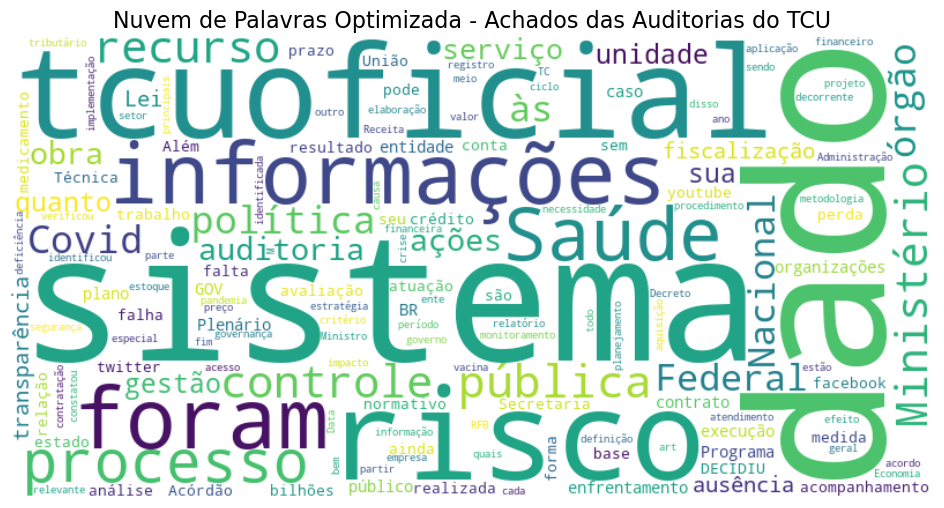

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Lista adicional de stopwords em português para complementar as stopwords padrão
stopwords_pt = {
    'de', 'da', 'do', 'das', 'dos', 'em', 'e', 'é', 'ser', 'para', 'se', 'que', 'não',
    'com', 'os', 'as', 'ao', 'aos', 'pela', 'pelas', 'pelo', 'pelos', 'um', 'uma', 'uns',
    'umas', 'o', 'a', 'no', 'na', 'nos', 'nas', 'por', 'mais', 'ou', 'como', 'foi', 'há',
    'também', 'entre', 'sobre', 'até', 'isso', 'esse', 'esta', 'estes', 'essas', 'esse', 'à', 'tcu'
}

# Combina stopwords padrão (inglês) com as em português definidas acima
stopwords = STOPWORDS.union(stopwords_pt)

# Concatenar os textos da coluna 'O QUE O TCU ENCONTROU'
textos = ' '.join([item['O QUE O TCU ENCONTROU'] for item in dados_fichas])

# Gerar a nuvem de palavras removendo stopwords
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=150,
                      collocations=False).generate(textos)

# Plotar a nuvem de palavras optimizada
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras Otimizada - Achados das Auditorias do TCU', fontsize=16)
plt.show()


<hr>

## Tarefa

### Familiarização com a obtenção de dados a partir de packages Python

Como forma de dinamizar a atividade, optou-se por não escolher duas temáticas específicas, mas sim buscar nos <b>trending topics</b> em tempo real. Esse processo demandou tempo, pois diversas abordagens foram testadas até encontrar uma solução eficaz. Abaixo, segue um resumo das tentativas realizadas.


1️⃣ Tentativa no Twitter
<p>
Inicialmente, a obtenção dos <i>trending topics</i> do Twitter foi explorada, porém a API atualmente exige uma conta paga para acesso aos dados. Diante dessa limitação, essa abordagem foi descartada.
</p>

2️⃣ Tentativa no Trends24
<p>
Em seguida, buscou-se extrair as tendências do site <a href="https://trends24.in">Trends24</a>. No entanto, o site possui mecanismos de proteção contra <i>web scraping</i>, bloqueando acessos automatizados e impedindo a extração confiável dos dados.
</p>

3️⃣ Tentativa no Google Trends com Requests + BeautifulSoup
<p>
O Google Trends foi testado como alternativa, utilizando as bibliotecas <code>requests</code> e <code>BeautifulSoup</code>. Apesar do retorno com <code>status_code 200</code>, os dados não eram exibidos corretamente, pois a página carrega o conteúdo dinamicamente via JavaScript, tornando essa abordagem ineficaz.
</p>

4️⃣ Solução com Selenium
<p>
A solução encontrada foi utilizar <strong>Selenium</strong>, uma biblioteca projetada para automatizar navegadores. Diferente de <code>requests</code>, que apenas captura HTML estático, o Selenium executa o JavaScript da página e permite acessar o DOM atualizado, garantindo a extração correta dos dados.
</p>
<p>
Para isso, foi necessário configurar o <a href="https://googlechromelabs.github.io/chrome-for-testing/>"<strong>ChromeDriver</strong></a>, que atua como um intermediário entre o Selenium e o Google Chrome, permitindo que o navegador seja controlado automaticamente. <span style='color: red;'>(No código será necessário alterar o endereço do ChromeDriver e utilizar a versão compatível com seu navegador, download disponível no link.)</span>
</p>

Poderia ser usada outra biblioteca?
<p>
Sim, além do Selenium, outras abordagens poderiam ser utilizadas, como:
<ul>
  <li><strong>Playwright:</strong> Alternativa moderna ao Selenium, mais rápida e eficiente, suportando múltiplos navegadores.</li>
  <li><strong>Scrapy + Splash:</strong> Framework de <i>web scraping</i> que, combinado com Splash, consegue processar JavaScript.</li>
  <li><strong>Puppeteer (para Node.js):</strong> Ferramenta do Google para automação de navegadores, amplamente utilizada para extração de dados dinâmicos.</li>
</ul>
</p>

<p>
A utilização do Selenium foi essencial para a obtenção dos <i>trending topics</i>, pois permitiu simular um navegador real e processar o carregamento dinâmico da página. 
</p>

In [1]:
pip install selenium webdriver-manager

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Para a construção do script foi necessário:
<p>
🔹 Importação das bibliotecas necessárias para o Selenium funcionar. <br>
🔹 <code>webdriver</code> permite o controle do navegador. <br>
🔹 <code>By</code> é usado para localizar elementos no DOM. <br>
🔹 <code>Service</code> gerencia a comunicação com o ChromeDriver. <br>
🔹 <code>Options</code> define configurações para o navegador (como rodar em modo headless). <br>
🔹 <code>time</code> é utilizado para garantir o carregamento correto dos elementos da página.
</p>

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time

def obter_topicos_google_trends():
    options = Options()
    options.add_argument('--headless') # Executa o navegador em segundo plano (sem interface gráfica)
    options.add_argument('--no-sandbox') # Evita restrições em alguns sistemas

    service = Service(ChromeDriverManager().install())
    driver  = webdriver.Chrome(service=service, options=options)
    
    url = "https://trends.google.com/trends/trendingsearches/daily?geo=BR"
    driver = webdriver.Chrome(service=Service(), options=options)
    driver.get(url)

    time.sleep(5)  # Espera carregar o conteúdo JavaScript

    topicos_elements = driver.find_elements(By.CSS_SELECTOR, 'div.mZ3RIc')

    topicos = [topico.text.strip() for topico in topicos_elements[:2]]

    driver.quit()

    return topicos

topicos_em_alta = obter_topicos_google_trends()
print(f"Tópicos em alta (Google Trends): {topicos_em_alta}")


Tópicos em alta (Google Trends): ['fluminense x ec vitória', 'real madrid x ath. bilbao']


### Obtenção de Imagens Relacionadas aos Tópicos em Alta


<p>
Após a extração dos <i>trending topics</i> do Brasil utilizando o <strong>Selenium</strong>, o próximo passo foi buscar por imagens relacionadas a cada um dos tópicos extraídos, utilizando a <strong>SerpApi</strong>.
</p>

<b>O que é a SerpApi?</b>
<p>
A <a href="https://serpapi.com/">SerpApi</a> é um serviço que permite acessar resultados do <strong>Google Search</strong> de forma automatizada via API. Com ela, é possível obter resultados de pesquisa padrão, notícias, vídeos e, neste caso, imagens. Isso facilita a extração de dados sem a necessidade de realizar o <i>web scraping</i> diretamente no Google, contornando restrições como captchas e carregamento dinâmico de conteúdo.
</p>
<p>
A SerpApi não é um package, e não é um pacote no sentido de uma biblioteca Python, mas sim um serviço de API externa. No entanto, foi utilizado o <b>package</b> oficial para facilitar a comunicação com essa API, que foi instalado via <code>pip install <b>google-search-results</b></code>. Esse pacote fornece métodos prontos para realizar buscas e retornar os resultados estruturados.
</p>

In [26]:
pip install google-search-results

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32083 sha256=54531681cc7846c8cdb8768c4437944d8eb4f14630f11a3ddb66a6155c8ef5ef
  Stored in directory: c:\users\tassiacarvalho\appdata\local\pip\cache\wheels\0c\47\f5\89b7e770ab2996baf8c910e7353d6391e373075a0ac213519e
Successfully built google-search-results
Note: you may need to restart the kernel to use updated packages.


### Como as imagens serão obtidas?

<p>
O código abaixo utiliza a SerpApi para realizar buscas de imagens no Google, com os seguintes passos:
<ul>
  <li>✅ Para cada tópico extraído do Google Trends, uma busca por imagens será feita. Coletando apenas URLs únicas</li>
  <li>✅ O script solicita até <strong>1000 imagens</strong> por tópico, porém o script é interrompido quando a API não retorna mais imagens, ou quando os links são duplicados</li>
  <li>✅ As imagens são baixadas em parelelo com uso do ThreadPoolExecutor (até 10 downloads simultâneos) e armazenadas em uma pasta específica.</li>
  <li>✅ Caso alguma imagem não possa ser baixada, o erro será tratado para evitar interrupções</li>
</ul>
</p>

<p>
Esse processo permitirá obter um conjunto de imagens representativas dos tópicos mais comentados do momento, podendo ser utilizado para análises visuais, reconhecimento de padrões ou até mesmo geração de relatórios.
</p>

<h3>Execução do Código</h3>
<p>
Agora, basta executar o código abaixo para realizar o download das imagens automaticamente! 🚀
</p>

In [18]:
import os
import requests
import json
from serpapi import GoogleSearch
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed

# Determina o diretório atual (se estiver em script, usa __file__; em notebook, cwd())
here = Path(__file__).resolve().parent if "__file__" in globals() else Path().cwd()
# Sobe uma pasta e aponta para keys.json
keys_path = here.parents[1] / "keys.json"
with open(keys_path, "r", encoding="utf-8") as f:
    SERPAPI_KEY = json.load(f)["SERPAPI_KEY"]

# Criar um diretório para armazenar as imagens
output_dir = "imagens_baixadas"
os.makedirs(output_dir, exist_ok=True)

def download_image(tema, url, idx):
    try:
        resp = requests.get(url, timeout=5)
        if resp.status_code == 200:
            nome = f"{tema.replace(' ', '_')}_{idx+1}.jpg"
            caminho = os.path.join(output_dir, nome)
            with open(caminho, "wb") as img_file:
                img_file.write(resp.content)
            return True
    except Exception:
        pass
    return False

def baixar_imagens_com_contador(tema, numero_imagens):
    per_page    = 100
    unique_urls = []
    seen        = set()
    page        = 0

    while len(unique_urls) < numero_imagens:
        params = {
            "engine":  "google",
            "q":       tema,
            "tbm":     "isch",
            "ijn":     page,           
            "num":     per_page,       
            "api_key": SERPAPI_KEY
        }
        result  = GoogleSearch(params).get_dict()
        imagens = result.get("images_results", [])

        if not imagens:
            print(f"❗️ Sem mais resultados em ijn={page}.")
            break

        before = len(unique_urls)
        for img in imagens:
            url = img.get("original")
            if url and url not in seen:
                seen.add(url)
                unique_urls.append(url)
                if len(unique_urls) >= numero_imagens:
                    break
        after = len(unique_urls)

        if after == before:
            print(f"❗️ Apenas links duplicados na página={page}.")
            break

        page += 1

    urls = unique_urls[:numero_imagens]
    total = len(urls)
    print(f"✅ URLs coletadas: {total}/{numero_imagens}\n")

    #cria até 10 threads que trabalham ao mesmo tempo baixando imagens.
    baixadas = 0
    with ThreadPoolExecutor(max_workers=10) as executor:
        futures = {
            executor.submit(download_image, tema, url, idx): idx
            for idx, url in enumerate(urls)
        }
        for future in as_completed(futures):
            if future.result():
                baixadas += 1
                if baixadas % 100 == 0 or baixadas == total:
                    print(f"📊 {baixadas}/{total} imagens baixadas para: {tema}")

    print(f"\n🎉 Concluído para '{tema}': {baixadas}/{total} imagens baixadas.\n")
                    
if __name__ == "__main__":
    numero_imagens_por_tema = 1000
    for tema in topicos_em_alta:
        baixar_imagens_com_contador(tema, numero_imagens_por_tema)
    print("🚀 Download concluído!")


❗️ Sem mais resultados em ijn=6.
✅ URLs coletadas: 506/1000

📊 100/506 imagens baixadas para: fluminense x ec vitória
📊 200/506 imagens baixadas para: fluminense x ec vitória
📊 300/506 imagens baixadas para: fluminense x ec vitória
📊 400/506 imagens baixadas para: fluminense x ec vitória

🎉 Concluído para 'fluminense x ec vitória': 443/506 imagens baixadas.

❗️ Sem mais resultados em ijn=8.
✅ URLs coletadas: 682/1000

📊 100/682 imagens baixadas para: real madrid x ath. bilbao
📊 200/682 imagens baixadas para: real madrid x ath. bilbao
📊 300/682 imagens baixadas para: real madrid x ath. bilbao
📊 400/682 imagens baixadas para: real madrid x ath. bilbao
📊 500/682 imagens baixadas para: real madrid x ath. bilbao
📊 600/682 imagens baixadas para: real madrid x ath. bilbao

🎉 Concluído para 'real madrid x ath. bilbao': 623/682 imagens baixadas.

🚀 Download concluído!


<hr>

## Tarefa

Familiarização com a obtenção de dados a partir de APIs

### Passo 1 e 2 - Recorrer à API “Text Search” ou à API “Image Search” do Arquivo.pt

<p>
Nesta atividade, foi utilizada a API Text Search disponibilizada pelo <strong>Arquivo.pt</strong> para recolher automaticamente conteúdos relacionados a <em>ciência e tecnológicas</em>. As etapas realizadas foram detalhadas a seguir:
</p>

1️⃣ Consulta à API "Text Search" do Arquivo.pt
<ul>
  <li>A consulta foi feita usando requisições HTTP diretamente para o endpoint da API <code>https://arquivo.pt/textsearch</code>.</li>
  <li>As buscas utilizaram palavras-chave específicas (<strong>"científica"</strong> e <strong>"tecnológica"</strong>) com o objetivo de retornar conteúdos relevantes sobre avanços científicos e tecnológicos.</li>
  <li>O script filtrou automaticamente os resultados, considerando apenas artigos cujos títulos continham as palavras-chave definidas, garantindo assim maior relevância nos dados coletados.</li>
</ul>

2️⃣ Organização e armazenamento automático dos dados
<ul>
  <li>O script cria dinamicamente uma pasta nomeada com a data atual no formato <code>/data/aaaa.mm.dd</code>.</li>
  <li>Os dados obtidos pela API são armazenados em dois formatos:
    <ul>
      <li><strong>Arquivo JSON:</strong> contendo toda a informação detalhada dos artigos (títulos, links, data, e pequenos excertos dos conteúdos).</li>
      <li><strong>Ficheiros individuais de texto:</strong> cada resultado também é gravado separadamente num arquivo <code>.txt</code>, permitindo consultas rápidas e individuais.</li>
    </ul>
  </li>
  <li>A gravação dos ficheiros garante que os nomes sejam seguros, removendo caracteres especiais inválidos para nomes de ficheiros.</li>
</ul>

3️⃣ Carregamento e visualização dos resultados em memória
<ul>
  <li>Após o armazenamento dos dados, o ficheiro JSON gerado é novamente carregado em memória para garantir sua integridade.</li>
  <li>O script imprime uma amostra dos conteúdos, apresentando os detalhes dos primeiros 5 artigos:
    <ul>
      <li><strong>Título</strong></li>
      <li><strong>URL</strong> original do artigo</li>
      <li><strong>Data de publicação</strong></li>
      <li><strong>Pequeno excerto (snippet)</strong> do conteúdo</li>
    </ul>
  </li>
</ul>

<p>
Esta abordagem permitiu uma extração rápida e eficiente de conteúdos relevantes a partir do Arquivo.pt, facilitando o uso futuro destes dados para aplicações adicionais.
</p>


In [4]:
import os
import requests
import json
from datetime import datetime
import re

def safe_filename(s):
    """
    Remove caracteres inválidos para nomes de arquivos em sistemas Windows.
    """
    return re.sub(r'[\\/*?:"<>|]', '_', s)

# Obter data atual no formato 'aaaa.mm.dd'
data_execucao = datetime.now().strftime('%Y.%m.%d')

# Criar diretório dinamicamente: data/aaaa.mm.dd
pasta_destino = os.path.join('data', data_execucao)
os.makedirs(pasta_destino, exist_ok=True)

# Endpoint da API Text Search do Arquivo.pt
api_url = 'https://arquivo.pt/textsearch'

# Lista de palavras-chave para busca e filtragem
palavras_chave = ["científica", "tecnológica"]

resultados_aggregados = []

# Para cada palavra-chave, realizar uma busca individual
for palavra in palavras_chave:
    print(f"Buscando por: {palavra}")
    params = {
        'q': palavra,
        'maxItems': 200,
        'prettyPrint': True
    }
    response = requests.get(api_url, params=params)
    if response.status_code == 200:
        try:
            dados = response.json()
            if 'response_items' in dados:
                for item in dados['response_items']:
                    # Filtrar: o título deve conter pelo menos uma das palavras-chave
                    titulo = item.get('title', '').lower()
                    if any(chave in titulo for chave in palavras_chave):
                        resultados_aggregados.append(item)
            else:
                print("Chave 'response_items' não encontrada na resposta para:", palavra)
        except Exception as e:
            print("Erro ao processar JSON para a palavra", palavra, ":", e)
    else:
        print(f"Erro na requisição para a palavra {palavra}: {response.status_code}")

# Remover duplicatas (baseando-se na URL)
resultados_unicos = []
urls_vistas = set()
for item in resultados_aggregados:
    url = item.get('linkToArchive', '')
    if url and url not in urls_vistas:
        urls_vistas.add(url)
        resultados_unicos.append(item)

# Salvar os resultados agregados em um arquivo JSON na pasta criada
caminho_json = os.path.join(pasta_destino, 'resultados.json')
with open(caminho_json, 'w', encoding='utf-8') as arquivo_json:
    json.dump(resultados_unicos, arquivo_json, ensure_ascii=False, indent=4)
print(f"✅ Dados agregados salvos em '{caminho_json}'.")

# Salvar cada resultado em um arquivo de texto individual
for i, resultado in enumerate(resultados_unicos):
    titulo = resultado.get('title', 'Sem_Titulo')
    # Gerar um nome de arquivo seguro e truncado para 50 caracteres
    titulo_seguro = safe_filename(titulo)[:50]
    nome_ficheiro = f"{titulo_seguro}_{i+1}.txt"
    caminho_txt = os.path.join(pasta_destino, nome_ficheiro)
    
    snippet = resultado.get('snippet', 'Sem snippet disponível.')
    with open(caminho_txt, 'w', encoding='utf-8') as arquivo_txt:
        arquivo_txt.write(titulo + '\n\n' + snippet)
print(f"✅ Ficheiros de texto salvos individualmente em '{pasta_destino}'!")


Buscando por: científica
Buscando por: tecnológica
✅ Dados agregados salvos em 'data\2025.03.20\resultados.json'.
✅ Ficheiros de texto salvos individualmente em 'data\2025.03.20'!


### Passo 3 - Carregamento e visualização dos resultados em memória

In [5]:
# Carregar novamente o arquivo JSON e exibir o conteúdo de 5 registros
with open(caminho_json, 'r', encoding='utf-8') as arquivo_json:
    conteudo_json = json.load(arquivo_json)

print("\n📌 Exibindo os conteúdos dos primeiros 5 registros:")
for registo in conteudo_json[:5]:
    print(f"\nTítulo: {registo.get('title', 'Sem título')}")
    print(f"URL: {registo.get('linkToArchive', 'Sem URL')}")
    print(f"Data de publicação: {registo.get('tstamp', 'Sem data de publicação')}")
    print(f"Texto: {registo.get('snippet', '')[:150]}...")



📌 Exibindo os conteúdos dos primeiros 5 registros:

Título: FCCN - Fundação para a Computação Científica Nacional
URL: https://arquivo.pt/wayback/20050331220336/http://www.fccn.pt/
Data de publicação: 20050331220336
Texto: FCCN - Funda&ccedil;&atilde;o para a Computa&ccedil;&atilde;o <em>Cient&iacute;fica</em> Nacional &nbsp; Localiza&ccedil;&atilde;o Contacte-nos FCCN |...

Título: Ficção científica – Wikipédia, a enciclopédia livre
URL: https://arquivo.pt/wayback/20150410094830/http://pt.wikipedia.org/wiki/Fic%C3%A7%C3%A3o_cient%C3%ADfica
Data de publicação: 20150410094830
Texto: Fic&ccedil;&atilde;o <em>cient&iacute;fica</em> &#8211; Wikip&eacute;dia, a enciclop&eacute;dia livre Fic&ccedil;&atilde;o <em>cient&iacute;fica</em> ...

Título: FCCN - Fundação para a Computação Científica Nacional
URL: https://arquivo.pt/wayback/20100804063841/http://www.fccn.pt/
Data de publicação: 20100804063841
Texto: FCCN - Funda&ccedil;&atilde;o para a Computa&ccedil;&atilde;o <em>Cient&iacute;fica<

### Passo 4 - Proposta de candidatura ao Prémio Arquivo.pt 2025.

Ideação realizada pelas alunas <b>Tassia Carvalho(14307)  e Adriana Vinhas(14940)</b>

A ideia do projeto é desenvolver um sistema interativo em que o utilizador pode selecionar uma temática específica a partir de uma caixa de opções disponibilizadas na interface. As temáticas propostas serão extraídas e validadas de acordo com a base de dados obtida do Arquivo.pt.
Após a seleção da temática pelo utilizador, o sistema utiliza os conteúdos previamente filtrados e organizados do Arquivo.pt para gerar automaticamente prompts adequados para ferramentas avançadas de criação de vídeos por inteligência artificial, como o Sora, da OpenAI. Esses vídeos terão o objetivo educacional, informativo e cultural, abordando temas como descobertas científicas, avanços tecnológicos e eventos históricos relevantes.

<b>Impacto Social e Científico:</b> O projeto proporcionará acesso democrático e simplificado a conteúdos históricos importantes, contribuindo para o aumento do conhecimento cultural e científico da sociedade. Ao usar vídeos gerados automaticamente, o sistema ajudará a envolver diferentes públicos, especialmente jovens e estudantes, estimulando o interesse por história, ciência e tecnologia.

<b>Relevância da utilização do Arquivo.pt:</b> A integração do Arquivo.pt garante que os conteúdos sejam autênticos, fidedignos e de valor histórico significativo. O arquivo fornece uma fonte robusta e rica para garantir qualidade e precisão nos conteúdos apresentados, conferindo credibilidade científica e acadêmica ao projeto.

<b>Originalidade:</b> Este projeto apresenta uma abordagem inovadora ao combinar técnicas de inteligência artificial com arquivos históricos da web. Ao automatizar a criação de vídeos educativos a partir de dados históricos preservados digitalmente, o projeto oferece uma solução criativa e ainda pouco explorada no contexto educacional e cultural.

<b>Exequibilidade:</b> A concretização do projeto é viável devido à disponibilidade de APIs robustas como a do Arquivo.pt, que permite o acesso simplificado aos dados históricos, e ferramentas avançadas como o Sora, que proporcionam uma geração eficiente e de qualidade de vídeos utilizando a inteligência artificial. As tecnologias necessárias são acessíveis e amplamente documentadas, em particular, o uso de bibliotecas Python, como o Sora Python SDK, torna a integração com o Sora ainda mais acessível e prática, garantindo viabilidade técnica do desenvolvimento do sistema. 


### Passo 5 - Recorrer à utilização de uma API para extrair dados.

No desenvolvimento da tarefa 2 foi utilizada o GoogleSearch via SerpApi para a obtenção dos dados da API, que permitiu extrair imagens relacionadas aos tópicos em alta. Essa abordagem possibilitou a captura e download de um grande volume de imagens, servindo como uma forma dinâmica de explorar visualmente os temas de interesse.
Agora, para ampliar a análise e permanecer com o uso informações atualizadas, foi escolhida a NewsAPI, por seu desempenho na obtenção de notícias em destaque. Assim, a NewsAPI permite monitorar os principais headlines e tendências, fornecendo uma visão abrangente do cenário noticioso.

Resposta completa da API:
{'status': 'ok', 'totalResults': 37, 'articles': [{'source': {'id': None, 'name': 'New York Post'}, 'author': 'Zach Braziller', 'title': 'Knicks ride insane fourth-quarter run with help from unexpected hero to take thrilling Game 1 over Pistons - New York Post', 'description': 'It was a back-and-forth Game 1 at Madison Square Garden, but the Knicks used one furious rally to take a 1-0 series lead.', 'url': 'https://nypost.com/2025/04/19/sports/knicks-ride-wild-fourth-quarter-run-to-take-game-1-over-pistons/', 'urlToImage': 'https://nypost.com/wp-content/uploads/sites/2/2025/04/newspress-collage-c6x1o5m7u-1745120730700.jpg?quality=75&strip=all&1745106367&w=1024', 'publishedAt': '2025-04-20T05:10:05Z', 'content': 'This felt like last spring.\xa0\r\nDefense, grit, tenacity adjectives that havent been used much about these Knicks.\xa0\r\nIn their playoff opener, they embodied the injury-depleted team of a year ago.\xa0\r\nThe … [+5071 chars]'}, {'source': {'id': N

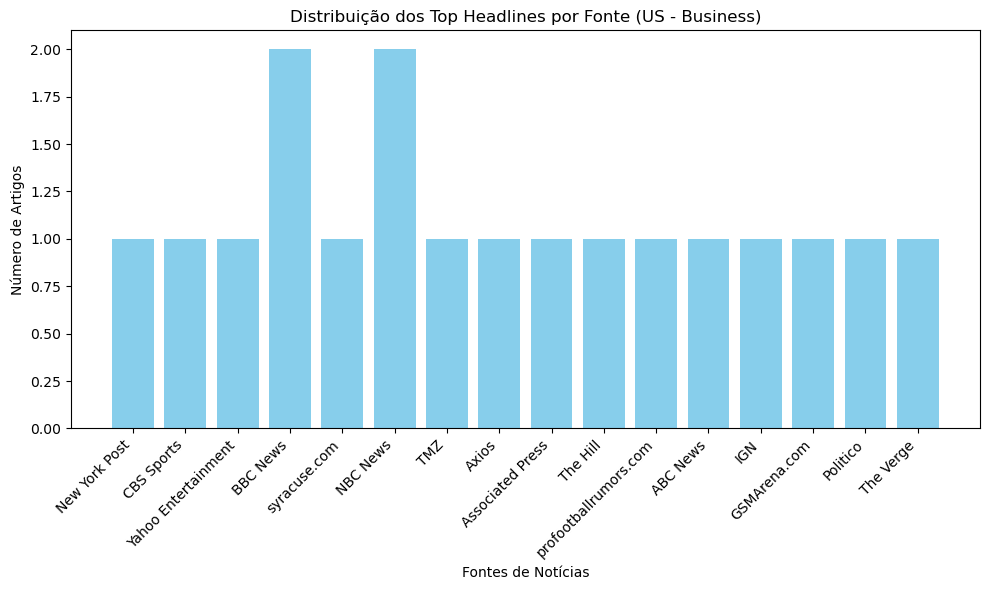

In [20]:
import requests
from collections import Counter
import matplotlib.pyplot as plt

#Alterar para sua chave, nesse caso obter no site newsapi
here = Path(__file__).resolve().parent if "__file__" in globals() else Path().cwd()
keys_path = here.parents[1] / "keys.json"
with open(keys_path, "r", encoding="utf-8") as f:
    api_key = json.load(f)["newsapi"]

# URL da API com os parâmetros country (país) e category (categoria)
url = f'https://newsapi.org/v2/top-headlines?country=us&apiKey={api_key}'

response = requests.get(url)
data = response.json()

print("Resposta completa da API:")
print(data)

if data.get('status') == 'ok':
    articles = data.get('articles', [])
    
    if articles:
        # Extrai os nomes das fontes de cada artigo
        sources = [article['source']['name'] for article in articles]
        
        # Conta a frequência de cada fonte
        counter = Counter(sources)
        
        print("Fontes e número de artigos:")
        for source, count in counter.items():
            print(f"{source}: {count}")
        
        # Prepara os dados para o gráfico
        labels = list(counter.keys())
        counts = list(counter.values())
        
        plt.figure(figsize=(10, 6))
        plt.bar(labels, counts, color='skyblue')
        plt.xlabel('Fontes de Notícias')
        plt.ylabel('Número de Artigos')
        plt.title('Distribuição dos Top Headlines por Fonte (US - Business)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Nenhum artigo foi encontrado.")
else:
    print("Erro ao obter dados:", data.get("message", "Erro desconhecido"))



A <b>NewsAPI oferece dois endpoints principais</b>, cada um com seu conjunto de filtros que permitem refinar as buscas conforme o interesse. A seguir, uma descrição detalhada dos filtros disponíveis:

<b>Endpoint: /v2/top-headlines</b> - Este endpoint é utilizado para obter os principais destaques (breaking news) de acordo com critérios geográficos ou temáticos. Os filtros mais comuns são:

<ul>
    <li>country - Define o país de onde as notícias serão extraídas, utilizando o código ISO 3166-1 de duas letras (por exemplo, us para Estados Unidos ou br para Brasil).</li>
    <li>category - Permite filtrar as notícias por uma categoria específica. As categorias aceitas são: business, entertainment, general, health, science, sports e technology.</li>
    <li>sources - Especifica uma ou mais fontes de notícias (identificadores) separadas por vírgula. Quando esse parâmetro é utilizado, os filtros country e category não podem ser combinados com ele.</li>
    <li>q - Permite a busca por palavras-chave ou frases específicas nos artigos. </li>
    <li>pageSize - Determina o número de resultados retornados por página. O valor padrão é 20, com um máximo de 100.
    <li>page - Indica o número da página para a paginação dos resultados.</li>
    <li> apiKey - Sua chave de acesso para autenticação na API.</li>
</ul>

<b>Endpoint: /v2/everything</b> - Esse endpoint permite uma busca mais abrangente por artigos publicados, possibilitando a definição de períodos e critérios de ordenação. Os filtros disponíveis incluem:

<ul>
    <li>q - Busca geral por uma palavra-chave ou frase presente no conteúdo dos artigos.</li>
    <li>qInTitle - Limita a busca para que a palavra-chave apareça somente nos títulos dos artigos.</li>
    <li>sources - Especifica fontes de notícias, assim como no endpoint de top-headlines, mas aqui você pode combinar com outros filtros.</li>
    <li>domains - Restringe a busca a artigos publicados em domínios específicos.</li>
    <li>excludeDomains - Exclui os artigos que vieram de determinados domínios.</li>
    <li>from - Define a data inicial (no formato ISO 8601) para os artigos a serem retornados.</li>
    <li>to - Define a data final (no formato ISO 8601) para os artigos a serem retornados.</li>
    <li>language - Filtra os artigos pelo idioma. Os códigos de idioma seguem o padrão ISO 639-1 (por exemplo, en para inglês, pt para português).</li>
    <li>sortBy - Especifica o critério de ordenação dos resultados. As opções disponíveis são:
        relevancy: classifica pela relevância para a consulta;
        popularity: classifica pela popularidade dos artigos;
        publishedAt: classifica pela data de publicação (mais recentes primeiro).</li>
    <li>pageSize - Número de resultados retornados por página (padrão 20, máximo 100).</li>
    <li>page - Número da página para a paginação dos resultados.</li>
    <li>apiKey - Chave de acesso necessária para autenticação na API.</li>
</ul>

<hr>

<font size="1">Observações:

<p><font size="1">
Todo o trabalho desenvolvido contou com o auxílio da ferramenta <strong>ChatGPT</strong>, especialmente nas etapas de:
</p>
<ul><font size="1">
    <li><strong>Correção e refinamento dos textos:</strong> Melhorias na clareza, concisão e rigor técnico, contribuindo para uma escrita fluente e coerente.</li>
    <li><strong>Correção e geração dos códigos:</strong> Desenvolvimento de scripts Python a partir de prompts concisos, diretos e claros. Sugestões de ajustes e resolução rápida de erros.</li>
</ul>

In [22]:
import os
from serpapi import GoogleSearch
from bs4 import BeautifulSoup as bs

here = Path(__file__).resolve().parent if "__file__" in globals() else Path().cwd()
keys_path = here.parents[1] / "keys.json"
with open(keys_path, "r", encoding="utf-8") as f:
    SERPAPI_KEY = json.load(f)["SERPAPI_KEY"]
q = "ricardo campos ubi"

# Nome do arquivo de saída
output_file = "bs.html"
if os.path.exists(output_file):
    os.remove(output_file)

html_pages = ""

# Iterar por 5 páginas de resultados (start=0, 10, 20, 30 e 40)
for pagina in range(5):
    params = {
        "engine": "google",
        "q": q,
        "start": pagina * 10,
        "api_key": SERPAPI_KEY
    }
    search = GoogleSearch(params)
    result = search.get_dict()
    
    # Inicia um bloco HTML para a página atual
    page_html = f"<div><h2>Resultados da Página {pagina + 1}</h2>"
    
    # Verifica se há resultados orgânicos e os adiciona ao HTML
    organic_results = result.get("organic_results", [])
    if organic_results:
        for res in organic_results:
            title = res.get("title", "Sem Título")
            snippet = res.get("snippet", "")
            link = res.get("link", "#")
            page_html += f"<div style='margin-bottom:20px;'><h3><a href='{link}'>{title}</a></h3><p>{snippet}</p></div>"
    else:
        page_html += "<p>Nenhum resultado encontrado.</p>"
    
    page_html += "</div>"
    html_pages += page_html

# Cria uma estrutura HTML completa
full_html = f"""
<html>
  <head>
    <meta charset='utf-8'>
    <title>Resultados de Pesquisa - {q}</title>
  </head>
  <body>
    {html_pages}
  </body>
</html>
"""

# Utiliza o BeautifulSoup para "embelezar" o HTML
bs_data = bs(full_html, 'html.parser')

# Salva o HTML formatado no arquivo
with open(output_file, "w", encoding="utf-8") as file:
    file.write(bs_data.prettify())

print("🚀 Resultados salvos em", output_file)

🚀 Resultados salvos em bs.html


In [23]:
import os
import requests
from serpapi import GoogleSearch
from bs4 import BeautifulSoup as bs
import pandas as pd

# Definir a API Key do SerpApi e o termo de busca
here = Path(__file__).resolve().parent if "__file__" in globals() else Path().cwd()
keys_path = here.parents[1] / "keys.json"
with open(keys_path, "r", encoding="utf-8") as f:
    SERPAPI_KEY = json.load(f)["SERPAPI_KEY"]
q = "ricardo campos ubi"

# Lista para armazenar os resultados com o link e o título da página
results = []

# Cabeçalho para as requisições, simulando um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Iterar por 5 páginas de resultados (start=0, 10, 20, 30 e 40)
for pagina in range(5):
    params = {
        "engine": "google",
        "q": q,
        "start": pagina * 10,
        "api_key": SERPAPI_KEY
    }
    search = GoogleSearch(params)
    result = search.get_dict()
    
    # Obtém os resultados orgânicos da página
    organic_results = result.get("organic_results", [])
    for res in organic_results:
        link = res.get("link")
        if link:
            try:
                # Acessa o link e extrai o título da página
                response = requests.get(link, headers=headers, timeout=10)
                if response.status_code == 200:
                    soup = bs(response.text, "html.parser")
                    page_title = soup.title.string.strip() if soup.title and soup.title.string else "Sem título"
                else:
                    page_title = f"Erro: {response.status_code}"
            except Exception as e:
                page_title = f"Erro: {str(e)}"
            
            # Adiciona o link e o título extraído na lista de resultados
            results.append({
                "Link": link,
                "Page Title": page_title
            })

# Cria um DataFrame do pandas com os resultados
df = pd.DataFrame(results)
print(df)


                                                 Link  \
0                     https://www.di.ubi.pt/~rcampos/   
1   https://scholar.google.com/citations?user=abU3...   
2    https://www.inesctec.pt/en/people/ricardo-campos   
3            https://pt.linkedin.com/in/camposricardo   
4             https://di.ubi.pt/~rcampos/aboutme.html   
5               https://orcid.org/0000-0002-8767-8126   
6   https://www.pbs.up.pt/en/sobre-nos/corpo-docen...   
7   https://www.cienciavitae.pt/portal/en/1617-759...   
8   https://openreview.net/profile?id=~Ricardo_Cam...   
9   https://www.researchgate.net/profile/Ricardo-C...   
10   https://www.aoml.noaa.gov/people/ricardo-campos/   
11  https://www.facebook.com/JornalForumNoticias/p...   
12  https://www.facebook.com/story.php/?story_fbid...   
13    https://www.linkedin.com/pub/dir/Ricardo/Campos   
14        https://www.math.univ-toulouse.fr/~rcampos/   
15        https://www.youtube.com/watch?v=Trd0xiMq3rE   
16  https://scholar.google.com/